In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 ... 0 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 ... 0 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 ... 0 1 0]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 ... 0 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 ... 1 0 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 ... 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


# KNN

Best parameters set found on development set:
 {'n_neighbors': 20, 'weights': 'distance'}

 Best Score 0.783097743319043

 Grid scores on development set:
0.690 (+/-0.017) for {'n_neighbors': 5, 'weights': 'uniform'}
0.770 (+/-0.016) for {'n_neighbors': 5, 'weights': 'distance'}
0.666 (+/-0.019) for {'n_neighbors': 10, 'weights': 'uniform'}
0.779 (+/-0.016) for {'n_neighbors': 10, 'weights': 'distance'}
0.649 (+/-0.016) for {'n_neighbors': 15, 'weights': 'uniform'}
0.781 (+/-0.014) for {'n_neighbors': 15, 'weights': 'distance'}
0.648 (+/-0.018) for {'n_neighbors': 20, 'weights': 'uniform'}
0.783 (+/-0.015) for {'n_neighbors': 20, 'weights': 'distance'}
0.639 (+/-0.018) for {'n_neighbors': 25, 'weights': 'uniform'}
0.777 (+/-0.013) for {'n_neighbors': 25, 'weights': 'distance'}
0.635 (+/-0.021) for {'n_neighbors': 30, 'weights': 'uniform'}
0.780 (+/-0.012) for {'n_neighbors': 30, 'weights': 'distance'}
0.628 (+/-0.016) for {'n_neighbors': 35, 'weights': 'uniform'}
0.776 (+/-0.015) for {

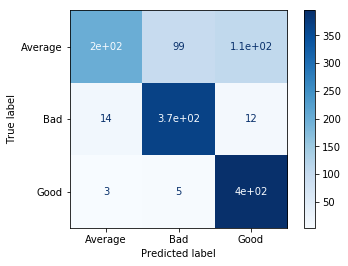

In [3]:
from sklearn.neighbors import KNeighborsClassifier
#Grid Search
tuned_parameters = [{'weights':  ['uniform', 'distance'], 'n_neighbors': [i for i in range(5,80,5)]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [4]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.81469157 0.7833312  0.80917577 0.77961212 0.79184328]


### K best Data

In [5]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


Best parameters set found on development set:
 {'n_neighbors': 15, 'weights': 'uniform'}

 Best Score 0.4670483286231308

 Grid scores on development set:
0.374 (+/-0.073) for {'n_neighbors': 5, 'weights': 'uniform'}
0.374 (+/-0.073) for {'n_neighbors': 5, 'weights': 'distance'}
0.397 (+/-0.072) for {'n_neighbors': 10, 'weights': 'uniform'}
0.397 (+/-0.072) for {'n_neighbors': 10, 'weights': 'distance'}
0.467 (+/-0.018) for {'n_neighbors': 15, 'weights': 'uniform'}
0.467 (+/-0.018) for {'n_neighbors': 15, 'weights': 'distance'}
0.395 (+/-0.049) for {'n_neighbors': 20, 'weights': 'uniform'}
0.395 (+/-0.049) for {'n_neighbors': 20, 'weights': 'distance'}
0.376 (+/-0.064) for {'n_neighbors': 25, 'weights': 'uniform'}
0.376 (+/-0.064) for {'n_neighbors': 25, 'weights': 'distance'}
0.403 (+/-0.031) for {'n_neighbors': 30, 'weights': 'uniform'}
0.403 (+/-0.031) for {'n_neighbors': 30, 'weights': 'distance'}
0.405 (+/-0.034) for {'n_neighbors': 35, 'weights': 'uniform'}
0.405 (+/-0.034) for {

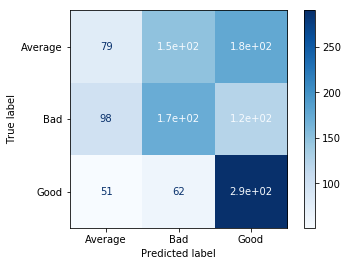

In [6]:
#Grid Search
tuned_parameters = [{'weights':  ['uniform', 'distance'], 'n_neighbors': [i for i in range(5,80,5)]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [7]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.16666667 0.16666667 0.26968363 0.20796569 0.16666667]


### K select Percentile

In [8]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.000210523684764536 0.005160091115494809 0.1361031518624642 0 0]
 [0.06578947122576177 0.013897588526412541 0.14469914040114612 0 0]
 [0.005263155277008304 0.010694145453587434 0.11891117478510028 0 1]
 ...
 [0.05263157645429362 0.859810398981424 0.1346704871060172 0 0]
 [0.000988368423653601 0.005792679656356735 0.1017191977077364 1 0]
 [0.17105262939750693 0.057828596847734885 0.13753581661891118 0 0]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


Best parameters set found on development set:
 {'n_neighbors': 20, 'weights': 'distance'}

 Best Score 0.7828484042799714

 Grid scores on development set:
0.682 (+/-0.022) for {'n_neighbors': 5, 'weights': 'uniform'}
0.774 (+/-0.016) for {'n_neighbors': 5, 'weights': 'distance'}
0.666 (+/-0.014) for {'n_neighbors': 10, 'weights': 'uniform'}
0.780 (+/-0.007) for {'n_neighbors': 10, 'weights': 'distance'}
0.655 (+/-0.017) for {'n_neighbors': 15, 'weights': 'uniform'}
0.781 (+/-0.008) for {'n_neighbors': 15, 'weights': 'distance'}
0.645 (+/-0.012) for {'n_neighbors': 20, 'weights': 'uniform'}
0.783 (+/-0.010) for {'n_neighbors': 20, 'weights': 'distance'}
0.638 (+/-0.014) for {'n_neighbors': 25, 'weights': 'uniform'}
0.780 (+/-0.011) for {'n_neighbors': 25, 'weights': 'distance'}
0.637 (+/-0.017) for {'n_neighbors': 30, 'weights': 'uniform'}
0.779 (+/-0.008) for {'n_neighbors': 30, 'weights': 'distance'}
0.631 (+/-0.017) for {'n_neighbors': 35, 'weights': 'uniform'}
0.775 (+/-0.011) for 

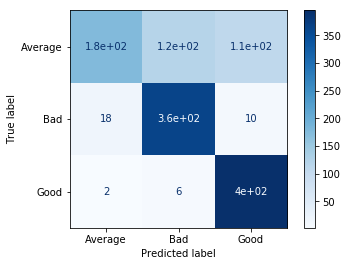

In [9]:
#Grid Search
tuned_parameters = [{'weights':  ['uniform', 'distance'], 'n_neighbors': [i for i in range(5,80,5)]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [10]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.80265414 0.79021451 0.78414432 0.79239879 0.78280254]


### PCA

In [11]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.45579826472607415 0.7046019793738675 -0.28825772682504214
  -0.10797909629417606]
 [-0.45821755567357747 -0.7059423617884181 -0.2916635351593642
  -0.09416709513907746]
 [-0.21141491550725078 -0.0031579275616275076 0.8725130077194068
  -0.3905247495057231]
 ...
 [-0.4581169085501422 0.717465384690377 -0.2917362036100829
  -0.07432632961038373]
 [0.751538661872047 -0.0025887537747943763 -0.10000450010468652
  -0.05167456137188623]
 [-0.4595648294413432 0.7112979984399956 -0.2918739685292939
  -0.09370938251503302]] ['Bad' 'Bad' 'Bad' ... 'Average' 'Bad' 'Average']
4800 4800 1200 1200


Best parameters set found on development set:
 {'n_neighbors': 5, 'weights': 'distance'}

 Best Score 0.7729524431220006

 Grid scores on development set:
0.673 (+/-0.005) for {'n_neighbors': 5, 'weights': 'uniform'}
0.773 (+/-0.007) for {'n_neighbors': 5, 'weights': 'distance'}
0.631 (+/-0.015) for {'n_neighbors': 10, 'weights': 'uniform'}
0.767 (+/-0.006) for {'n_neighbors': 10, 'weights': 'distance'}
0.609 (+/-0.014) for {'n_neighbors': 15, 'weights': 'uniform'}
0.766 (+/-0.008) for {'n_neighbors': 15, 'weights': 'distance'}
0.602 (+/-0.015) for {'n_neighbors': 20, 'weights': 'uniform'}
0.763 (+/-0.008) for {'n_neighbors': 20, 'weights': 'distance'}
0.589 (+/-0.007) for {'n_neighbors': 25, 'weights': 'uniform'}
0.757 (+/-0.008) for {'n_neighbors': 25, 'weights': 'distance'}
0.585 (+/-0.014) for {'n_neighbors': 30, 'weights': 'uniform'}
0.758 (+/-0.006) for {'n_neighbors': 30, 'weights': 'distance'}
0.579 (+/-0.017) for {'n_neighbors': 35, 'weights': 'uniform'}
0.753 (+/-0.008) for {

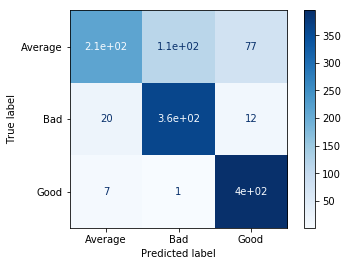

In [12]:
#Grid Search
tuned_parameters = [{'weights':  ['uniform', 'distance'], 'n_neighbors': [i for i in range(5,80,5)]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [13]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.80214896 0.7837073  0.78378559 0.79849178 0.80554772]
